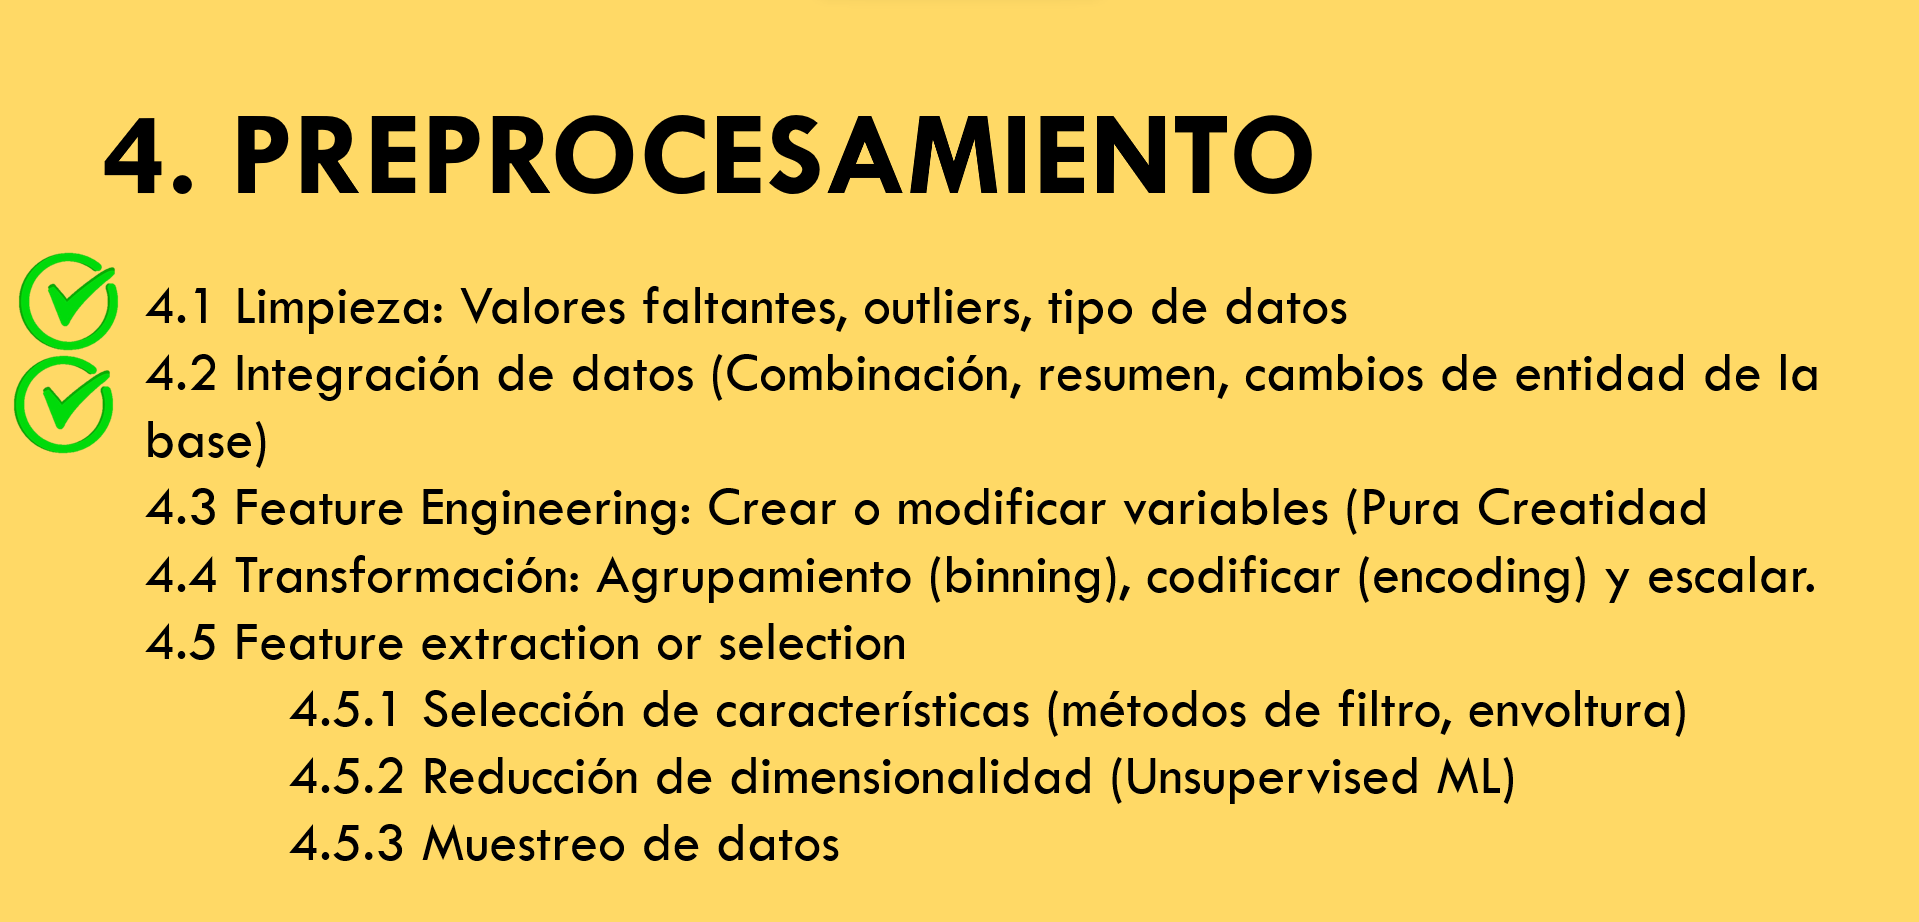

<p><font size="6"><b>Transformar, reorganizar e integrar las bases</b></font></p>



---

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. The group-by operation

Imagina que tienes una base de datos de personas y por cada persona tienes su salario y un id del hogar al que pertenecen. Supongamos que para efectos de tu investigación lo que necesitas es los ingresos por hogar, necesitarías agregar los salarios de varias filas dada otra condición el ID. Para casos como esos funciona group-by 

In [6]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20],
                   'data2': [20, 5, 15, 5, 5, 18, 32, 85, 20]})
df

,key,data,data2
0,A,0,20
1,B,5,5
2,C,10,15
3,A,5,5
4,B,10,5
5,C,15,18
6,A,10,32
7,B,15,85
8,C,20,20


### Recap: aggregating functions

Al analizar datos, a menudo se calculan estadísticas resumidas (agregaciones como la media, el máximo, ...). Como hemos visto antes, podemos calcular fácilmente dicha estadística para una serie o columna utilizando uno de los muchos métodos disponibles. Por ejemplo:

In [12]:
df['data'].sum()

90

Sin embargo, en muchos casos sus datos contienen ciertos grupos y, en ese caso, es posible que desee calcular esta estadística para cada uno de los grupos.

Por ejemplo, en el marco de datos anterior "df", hay una columna "clave" que tiene tres valores posibles: "A", "B" y "C". Cuando queramos calcular la suma de cada uno de esos grupos, podríamos hacer lo siguiente:

In [13]:
for valor in ['A', 'B', 'C']:
    print(valor, df[df['key'] == valor]['data'].sum())

A 15
B 30
C 45


Esto se vuelve muy detallado cuando se tienen varios grupos. Podrías hacer lo anterior un poco más fácil recorriendo los diferentes valores, pero aún así, no es muy conveniente trabajar con ello.

Lo que hicimos anteriormente, aplicar una función en diferentes grupos, es una "operación de grupo", y pandas proporciona algunas funciones convenientes para esto.

### Groupby: aplicando funciones por grupo

El concepto "groupby" se conoce como operación "dividir-aplicar-combinar" e implica los siguientes pasos:

* **Dividir** los datos en grupos según algunos criterios
* **Aplicar** una función a cada grupo de forma independiente
* **Combinar/Mantener** los resultados en una estructura de datos

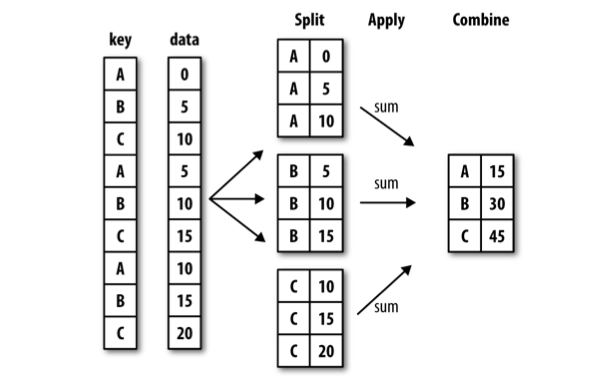


In [15]:
df.groupby('key') 

Por lo mismo, la función groupby() por sí sola devuelve un objeto, no hace más, no ha hecho ninguna computación, SOLO HIZO el SPLIT. Requiere una función para aplicar a los diferentes grupos que armó. La función puede ser de agregación, transformación o filtro.

## 1.1 Agregación/Combinación
(siguiendo el ejemplo del principio es la versión en la que la base de personas se agrega y queda una base de hogares)

Hay dos posibles sintáxis: utilizar la función aggregate o simplemente llamar la función (ya que por defecto se realiza aggregate)

In [14]:
#Divido pro key y aplico la suma para todas las columnas (COMBINANDO)
df.groupby('key').aggregate(np.sum)  # 'sum'

,data,data2
key,,
A,15,57
B,30,95
C,45,53


In [28]:
df.groupby('key').sum() #Da lo mismo porque aggregate es la función por defecto que se utiliza

,data,data2
key,,
A,15,57
B,30,95
C,45,53


In [27]:
#para una sola columna
df.groupby('key')['data'].sum()

key
A    15
B    30
C    45
Name: data, dtype: int64

¿para qué serviría entonces la función aggregate si ya viene por default?

In [32]:
df.groupby('key').aggregate(lambda x: x.max()-x.min()) 

,data,data2
key,,
A,10,27
B,10,80
C,10,5


### Aplicación del concepto groupby en el titanic data

In [17]:
df = pd.read_csv("titanic.csv")

In [ ]:
df.head()

<div class="alert alert-success">

<b>EJERCICIO</b>:

  <ul>
   <li>Calcule nuevamente la edad promedio para cada sexo, pero ahora usando groupby.</li>
</ul>
</div>

<div class="alert alert-success">

<b>EJERCICIO</b>:

  <ul>
   <li>Calcule el índice de supervivencia promedio de todos los pasajeros.</li>
</ul>
</div>

<div class="alert alert-success">

<b>EJERCICIO</b>:

  <ul>
   <li>Calcule este índice de supervivencia para todos los pasajeros menores de 25 años (recuerde: filtrado/indexación booleana).</li>
</ul>
</div>

## 1.2 Transforms

A veces no desea agregar los grupos, sino calcular el valor agregado y asignarlo a cada individuo dentro del grupo. Siguiendo el ejemplo del principio, la base de personas se mantiene como de personas pero hay una(s) nueva(s) columna(s) con valores agregados. Esto se puede lograr con `transform`:

In [33]:
df 

,key,data,data2
0,A,0,20
1,B,5,5
2,C,10,15
3,A,5,5
4,B,10,5
5,C,15,18
6,A,10,32
7,B,15,85
8,C,20,20


In [35]:
df.groupby('key').transform(np.mean) #obtengo el mismo número de individuos (filas) que al principio

,data,data2
0,5.0,19.000000
1,10.0,31.666667
2,15.0,17.666667
3,5.0,19.000000
4,10.0,31.666667
5,15.0,17.666667
6,5.0,19.000000
7,10.0,31.666667
8,15.0,17.666667


In [10]:
pd.concat([df,df.groupby('key').transform(np.mean)], axis=1) #juntando la original con la transformada

,key,data,data2,data,data2
0,A,0,20,5.0,19.000000
1,B,5,5,10.0,31.666667
2,C,10,15,15.0,17.666667
3,A,5,5,5.0,19.000000
4,B,10,5,10.0,31.666667
5,C,15,18,15.0,17.666667
6,A,10,32,5.0,19.000000
7,B,15,85,10.0,31.666667
8,C,20,20,15.0,17.666667


In [36]:
def normalize(group):
    return (group - group.mean()) / group.std()

In [37]:
df.groupby('key').transform(normalize)

,data,data2
0,-1.0,0.073922
1,-1.0,-0.577350
2,-1.0,-1.059626
3,0.0,-1.034910
4,0.0,-0.577350
5,0.0,0.132453
6,1.0,0.960988
7,1.0,1.154701
8,1.0,0.927173


In [40]:
df.groupby('key').transform(np.sum)

,data,data2
0,15,57
1,30,95
2,45,53
3,15,57
4,30,95
5,45,53
6,15,57
7,30,95
8,45,53


# Pivoting data

Las personas que conocen Excel probablemente conozcan la funcionalidad **Tablas dinámicas**:

Los datos de la tabla:

In [41]:
excelample = pd.DataFrame({'Month': ["January", "January", "January", "January", 
                                  "February", "February", "February", "February", 
                                  "March", "March", "March", "March"],
                   'Category': ["Transportation", "Grocery", "Household", "Entertainment",
                                "Transportation", "Grocery", "Household", "Entertainment",
                                "Transportation", "Grocery", "Household", "Entertainment"],
                   'Amount': [74., 235., 175., 100., 115., 240., 225., 125., 90., 260., 200., 120.]})

In [42]:
excelample

,Month,Category,Amount
0,January,Transportation,74.0
1,January,Grocery,235.0
2,January,Household,175.0
3,January,Entertainment,100.0
4,February,Transportation,115.0
5,February,Grocery,240.0
6,February,Household,225.0
7,February,Entertainment,125.0
8,March,Transportation,90.0
9,March,Grocery,260.0


In [44]:
excelample_pivot = excelample.pivot(index="Category", columns="Month", values="Amount")
excelample_pivot

Month,February,January,March
Category,,,
Entertainment,125.0,100.0,120.0
Grocery,240.0,235.0,260.0
Household,225.0,175.0,200.0
Transportation,115.0,74.0,90.0


¿Interesad@ en * totales *?

In [45]:
# sum columns
excelample_pivot.sum(axis=1)

Category
Entertainment     345.0
Grocery           735.0
Household         600.0
Transportation    279.0
dtype: float64

In [46]:
# sum rows
excelample_pivot.sum(axis=0)

Month
February    705.0
January     584.0
March       670.0
dtype: float64

## Pivot solo está reordenando tus datos

Nada se está agregando, si empezaste con 10 datos, terminas con 10 datos. Pivot es una función que reorganiza pero no agrega:

Pequeña submuestra del conjunto de datos del Titanic:

In [56]:
df = pd.DataFrame({'Fare': [7.25, 71.2833, 51.8625, 30.0708, 7.8542, 13.0],
                   'Pclass': [3, 1, 1, 2, 3, 2],
                   'Sex': ['male', 'female', 'male', 'female', 'female', 'male'],
                   'Survived': [0, 1, 0, 1, 0, 1]})

In [48]:
df

,Fare,Pclass,Sex,Survived
0,7.2500,3,male,0
1,71.2833,1,female,1
2,51.8625,1,male,0
3,30.0708,2,female,1
4,7.8542,3,female,0
5,13.0000,2,male,1


In [57]:
df.pivot(index='Sex', columns='Pclass', values='Fare')

Pclass,1,2,3
Sex,,,
female,71.2833,30.0708,7.8542
male,51.8625,13.0000,7.2500


In [49]:
df.pivot(index='Pclass', columns='Sex', values='Fare')

Sex,female,male
Pclass,,
1,71.2833,51.8625
2,30.0708,13.0000
3,7.8542,7.2500


In [50]:
df.pivot(index='Pclass', columns='Sex', values='Survived')

Sex,female,male
Pclass,,
1,1,0
2,1,1
3,0,0


Hasta ahora tan bueno ...

Usemos ahora el conjunto de datos completo del Titanic:

In [89]:
df = pd.read_csv("titanic.csv")

In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Reorganicemos considerando como filas el género y como columnas la clase, pero con toda la base (*no te preocupes por el try, except, aquí solo se usa para detectar un error*):

In [65]:
try:
    df.pivot(index='Sex', columns='Pclass', values='Fare')
except Exception as e:
    print("Exception!", e)

Exception! Index contains duplicate entries, cannot reshape


Esto no funciona, porque hay personas con el mismo género y misma clase, terminaríamos con múltiples valores para una celda, como dice el error: valores "duplicados" para las columnas de la selección. 

Excel automáticamente agregaría los valores duplicados (sumando, promedio, etc.), pero el método PIVOT no llega hasta allá solo reorganiza.

Como ejemplo, considere las siguientes filas de nuestras tres columnas de interés:

In [90]:
df.loc[[1, 3], ["Sex", 'Pclass', 'Fare']]

,Sex,Pclass,Fare
1,female,1,71.2833
3,female,1,53.1000


Dado que `pivot` es solo reestructurar datos, ¿a dónde deberían ir ambos valores de `Fare` para la misma combinación de `Sex` y `Pclass`?

Bueno, es necesario combinarlos de acuerdo con una funcionalidad de `aggregation`, que es compatible con la función **`pivot_table`**.

<div class="alert alert-danger">

<b>NOTE</b>:

 <ul>
  <li>**Pivot** es puramente reestructuración: se requiere un valor único para cada combinación de índice/columna.</li>
</ul>
</div>

# Pivot tables - agregar mientras pivota

In [69]:
df = pd.read_csv("titanic.csv")

In [70]:
df.pivot_table(index='Sex', columns='Pclass', values='Fare')

Pclass,1,2,3
Sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


<div class="alert alert-info">

<b>REMEMBER</b>:

 <ul>
  <li>De forma predeterminada, `pivot_table` toma la **media** de todos los valores que terminarían en una celda. Sin embargo, también puede especificar otras funciones de agregación utilizando la palabra clave `aggfunc`.</li>
</ul>
</div>

In [91]:
df.pivot_table(index='Sex', columns='Pclass', 
               values='Fare', aggfunc='max')

Pclass,1,2,3
Sex,,,
female,512.3292,65.0,69.55
male,512.3292,73.5,69.55


In [92]:
df.pivot_table(index='Sex', columns='Pclass', 
               values='Fare', aggfunc='count')

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Haga una tabla dinámica con las tasas de supervivencia (= número de personas sobrevivieron / número total de personas) para Pclass vs Sex.</li>
  <li>Trazar el resultado como un diagrama de barras.</li>
</ul>
</div>

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Haga una tabla de la tarifa mediana pagada por edad/menor de edad versus sexo.</li>
</ul>
</div>

# Melt

La función "melt" realiza la operación inversa de "pivote". Sirve para combinar columnas en una sola columna.

In [71]:
pivoted = df.pivot_table(index='Sex', columns='Pclass', values='Fare').reset_index()
pivoted.columns.name = None

In [72]:
pivoted

,Sex,1,2,3
0,female,106.125798,21.970121,16.118810
1,male,67.226127,19.741782,12.661633


Supongamos que tenemos un DataFrame como el anterior. Las observaciones (la tarifa promedio que pagan las personas) se distribuyen en diferentes columnas. En un conjunto de datos ordenado, cada observación se almacena en una fila. Para obtener esto, podemos usar la función `melt`:

In [73]:
pd.melt(pivoted)

,variable,value
0,Sex,female
1,Sex,male
2,1,106.125798
3,1,67.226127
4,2,21.970121
5,2,19.741782
6,3,16.11881
7,3,12.661633


Como puede ver arriba, la función `melt`melt coloca todas las etiquetas de las columnas en una columna y todos los valores en una segunda columna.

En este caso, esto no es exactamente lo que queremos. Nos gustaría mantener la columna 'Sex' por separado:

In [94]:
pd.melt(pivoted, id_vars=['Sex']) #, var_name='Pclass', value_name='Fare')

,Sex,variable,value
0,female,1,106.125798
1,male,1,67.226127
2,female,2,21.970121
3,male,2,19.741782
4,female,3,16.118810
5,male,3,12.661633


## Merge

Combinar diferentes bases de datos

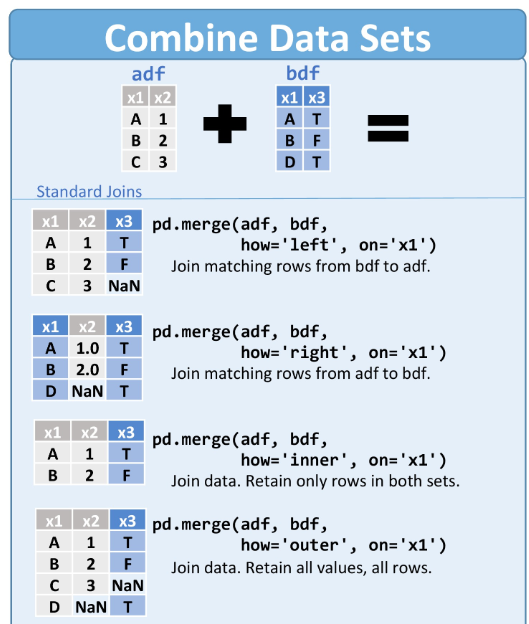

In [80]:
# Crear los dataframe
adf = pd.DataFrame({
    'x1': ['A', 'B', 'C'],
    'x2': [1, 2, 3]
})


bdf = pd.DataFrame({
    'x1': ['A', 'B', 'D'],
    'x3': ['T', 'F', 'T']
})

In [81]:
# Perform the different types of joins
pd.merge(adf, bdf, how='left', on='x1')


,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [85]:
pd.merge(adf, bdf, how='right', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


In [86]:
pd.merge(adf, bdf, how='inner', on='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F


In [87]:
pd.merge(adf, bdf, how='outer', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T
